In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Business questions")
print("What types of products satisfy customers the most?")
print("Do expensive products really = good ratings?")
print("What are the trends in feedback over time?")

Business questions
What types of products satisfy customers the most?
Do expensive products really = good ratings?
What are the trends in feedback over time?


In [4]:
df = pd.read_csv(r"D:\DATA_Project\customer_feedback_analysis\data_set\customer_feedback_cleaned.csv")
df

,customer_id,age,gender,product,rating,feedback,sentiment,spend,Date
0,C001,25.000000,M,Phone,5,สินค้าดีมาก ใช้งานลื่น,positive,15900,2024-01-05
1,C002,30.000000,F,Laptop,4,เครื่องแรง แต่แบตหมดไว,positive,28900,2024-01-06
2,C003,22.000000,F,Phone,2,เครื่องช้าและค้างบ่อย,negative,12900,2024-01-06
3,C004,40.000000,M,Tablet,5,เหมาะกับทำงานมาก,positive,18900,2024-01-07
4,C005,32.142857,F,Laptop,3,เฉย ๆ ไม่คุ้มราคา,neutral,27900,2024-01-08
5,C006,35.000000,M,Phone,1,แย่มาก พังเร็ว,negative,9900,2024-01-08
6,C007,28.000000,F,Tablet,4,จอชัด ใช้ง่าย,positive,17500,2024-01-09
7,C008,45.000000,M,Laptop,5,คุ้มค่ามาก แนะนำ,positive,31900,2024-01-10


In [6]:
df.groupby('product')['rating'].mean().sort_values(ascending=False)

product
Tablet    4.500000
Laptop    4.000000
Phone     2.666667
Name: rating, dtype: float64

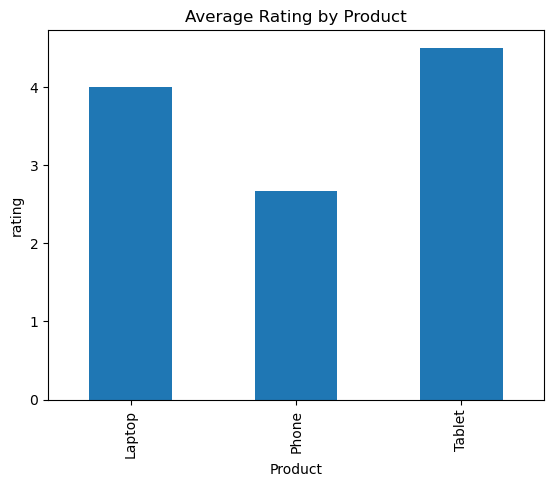

In [9]:
df.groupby('product')['rating'].mean().plot(kind='bar')
plt.title('Average Rating by Product')
plt.xlabel('Product')
plt.ylabel('rating')
plt.show()

In [10]:
#overall customers are most satisfied with tablets & we must adjust some phone functional.

In [13]:
df.rename(columns={'spend':'price'},inplace=True)

In [14]:
df.columns

Index(['customer_id', 'age', 'gender', 'product', 'rating', 'feedback',
       'sentiment', 'price', 'date'],
      dtype='object')

In [19]:
df[['rating','price']].sort_values(by = 'price', ascending = False)

,rating,price
7,5,31900
1,4,28900
4,3,27900
3,5,18900
6,4,17500
0,5,15900
2,2,12900
5,1,9900


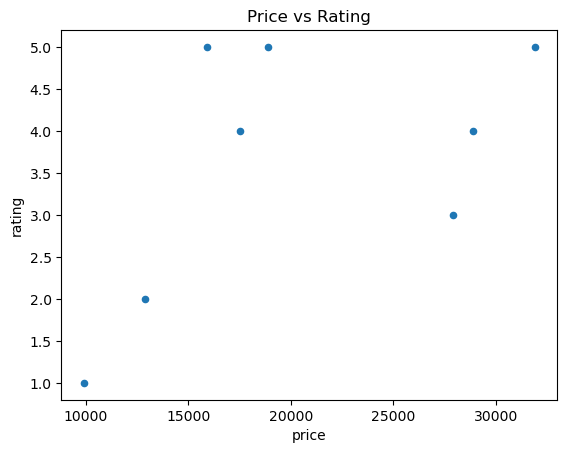

In [20]:
#scatter plot
df.plot(kind = 'scatter', x = 'price', y = 'rating')
plt.title('Price vs Rating')
plt.show()

In [ ]:
#Expensive products mostly get good ratings, but not always; some customers still give neutral feedback.

In [22]:
df.dtypes

customer_id     object
age            float64
gender          object
product         object
rating           int64
feedback        object
sentiment       object
price            int64
date            object
dtype: object

In [23]:
print(df.columns.tolist())

['customer_id', 'age', 'gender', 'product', 'rating', 'feedback', 'sentiment', 'price', 'date']


In [24]:
df.columns = df.columns.str.strip().str.lower()

In [25]:
df['date'] = df['date'].astype(str).str.strip()

In [26]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [27]:
df.dtypes

customer_id            object
age                   float64
gender                 object
product                object
rating                  int64
feedback               object
sentiment              object
price                   int64
date           datetime64[ns]
dtype: object

In [28]:
df.groupby('date').size()

date
2024-01-05    1
2024-01-06    2
2024-01-07    1
2024-01-08    2
2024-01-09    1
2024-01-10    1
dtype: int64

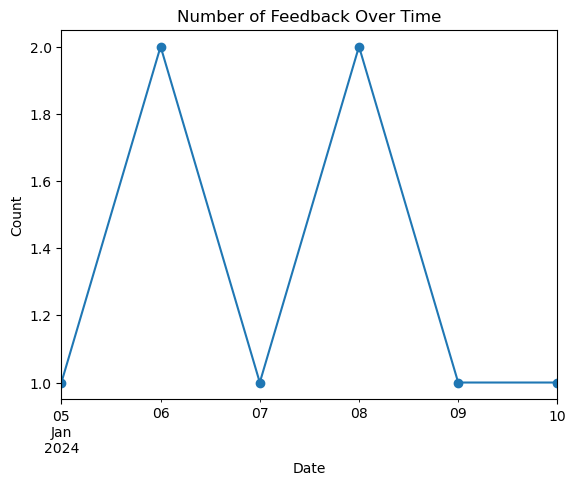

In [29]:
df.groupby('date').size().plot(marker='o')
plt.title('Number of Feedback Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [ ]:
#Feedback peaks early in the month but fluctuates afterward.